In [1]:
!pip install pandas
!pip install datetime
!pip install request
!pip install matplotlib 


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import datetime
from urllib import request
import zipfile
import os
from matplotlib import pyplot as plt 

In [3]:
#data = input('Selecione a data da carteira. EX: 03/2023').split('/')
data = str('02/2023').split('/')
mes = data[0]
ano = data[1]

In [4]:
caminho_projeto = r'C:\Users\Hyago\Desktop\Python\Carteiras'
caminho_carteiras =r'C:\Users\Hyago\Desktop\Python\Carteiras\Carteiras'

In [5]:
# baixando arquivos de carteira do banco de dados da CVM
url = rf'https://dados.cvm.gov.br/dados/FI/DOC/CDA/DADOS/cda_fi_{ano}{mes}.zip'

# baixar arquivo
request.urlretrieve(url,rf'C:\Users\Hyago\Desktop\Python\Carteiras\Carteiras\carteira_{ano}{mes}.zip')

URLError: <urlopen error [Errno 11002] getaddrinfo failed>

In [6]:
# extraindo base de dados dos zipfile
z = zipfile.ZipFile(rf'{caminho_carteiras}\carteira_{ano}{mes}.zip','r')
z.extractall(caminho_carteiras)
z.close()

In [5]:
lista_df = []
fundos_a_ser_filtrados = ['29.762.315/0001-58']

# lendo todos os arquivos zip
for i in os.listdir(caminho_carteiras):
    if '.csv' in i:
# garantindo que os blocos de dados serão inseridos na ordem correta e tratando os arquivos cada um de acordo com suas necessidades

    #TÍTULOS PÚBLICOS DO SELIC
        if f'BLC_1_{ano}{mes}' in i:
            #
            i = pd.read_csv(rf'{caminho_carteiras}\{i}',encoding='latin-1',on_bad_lines='skip',sep=';')
            i = i[i['CNPJ_FUNDO'].isin(fundos_a_ser_filtrados)]
            i = i[['TP_APLIC','TP_ATIVO','QT_POS_FINAL','VL_MERC_POS_FINAL','TP_TITPUB','DT_COMPTC']]
            i.rename(columns={'TP_TITPUB': 'ATIVO'}, inplace = True)
            lista_df.append(i)

    # COTAS DE FUNDOS DE INVESTIMENTO
        if f'BLC_2_{ano}{mes}' in i:
            i = pd.read_csv(rf'{caminho_carteiras}\{i}',encoding='latin-1',on_bad_lines='skip',sep=';')
            i = i[i['CNPJ_FUNDO'].isin(fundos_a_ser_filtrados)]
            i = i[['TP_APLIC','TP_ATIVO','QT_POS_FINAL','VL_MERC_POS_FINAL','NM_FUNDO_COTA','DT_COMPTC']]
            i.rename(columns={'NM_FUNDO_COTA': 'ATIVO'}, inplace = True)
            lista_df.append(i)

    # SWAP
        if f'BLC_3_{ano}{mes}' in i:
            i = pd.read_csv(rf'{caminho_carteiras}\{i}',encoding='latin-1',on_bad_lines='skip',sep=';')
            i = i[i['CNPJ_FUNDO'].isin(fundos_a_ser_filtrados)]
            i = i[['TP_APLIC','TP_ATIVO','QT_POS_FINAL','VL_MERC_POS_FINAL','DS_SWAP','DT_COMPTC']]
            i.rename(columns={'DS_SWAP': 'ATIVO'}, inplace = True)
            lista_df.append(i)

    # DEMAIS ATIVOS CODIFICADOS
        if f'BLC_4_{ano}{mes}' in i:
            i = pd.read_csv(rf'{caminho_carteiras}\{i}',encoding='latin-1',on_bad_lines='skip',sep=';')
            i = i[i['CNPJ_FUNDO'].isin(fundos_a_ser_filtrados)]
            i = i[['TP_APLIC','TP_ATIVO','QT_POS_FINAL','VL_MERC_POS_FINAL','CD_ATIVO','DT_COMPTC']]
            i.rename(columns={'CD_ATIVO': 'ATIVO'}, inplace = True)
            lista_df.append(i)

    # DEPÓSITOS A PRAZO E OUTROS TÍTULOS DE IF
        if f'BLC_5_{ano}{mes}' in i:
            i = pd.read_csv(rf'{caminho_carteiras}\{i}',encoding='latin-1',on_bad_lines='skip',sep=';')
            i = i[i['CNPJ_FUNDO'].isin(fundos_a_ser_filtrados)]
            i = i[['TP_APLIC','TP_ATIVO','QT_POS_FINAL','VL_MERC_POS_FINAL','EMISSOR','DT_COMPTC']]      
            i.rename(columns={'EMISSOR': 'ATIVO'}, inplace = True)
            lista_df.append(i)

    # TÍTULOS DO AGRONEGÓCIO E DE CRÉDITO PRIVADO
        if f'BLC_6_{ano}{mes}' in i:
            i = pd.read_csv(rf'{caminho_carteiras}\{i}',encoding='latin-1',on_bad_lines='skip',sep=';')
            i = i[i['CNPJ_FUNDO'].isin(fundos_a_ser_filtrados)]
            i = i[['TP_APLIC','TP_ATIVO','QT_POS_FINAL','VL_MERC_POS_FINAL','EMISSOR','DT_COMPTC']]
            i.rename(columns={'EMISSOR': 'ATIVO'}, inplace = True)
            lista_df.append(i)

    # INVESTIMENTO NO EXTERIOR
        if f'BLC_7_{ano}{mes}' in i:
            i = pd.read_csv(rf'{caminho_carteiras}\{i}',encoding='latin-1',on_bad_lines='skip',sep=';')
            i = i[i['CNPJ_FUNDO'].isin(fundos_a_ser_filtrados)]
            i = i[['TP_APLIC','TP_ATIVO','QT_POS_FINAL','VL_MERC_POS_FINAL','BV_MERC','DT_COMPTC']]
            i.rename(columns={'BV_MERC': 'ATIVO'}, inplace = True)
            lista_df.append(i)

    # DEMAIS ATIVOS NÃO CODIFICADOS
        if f'BLC_8_{ano}{mes}' in i:
            i = pd.read_csv(rf'{caminho_carteiras}\{i}',encoding='latin-1',on_bad_lines='skip',sep=';')
            i = i[i['CNPJ_FUNDO'].isin(fundos_a_ser_filtrados)]
            i = i[['TP_APLIC','TP_ATIVO','QT_POS_FINAL','VL_MERC_POS_FINAL','DS_ATIVO','DT_COMPTC']]
            i.rename(columns={'DS_ATIVO': 'ATIVO'}, inplace = True)
            lista_df.append(i)

    # PL
        if f'PL_{ano}{mes}' in i:
            i = pd.read_csv(rf'{caminho_carteiras}\{i}',encoding='latin-1',on_bad_lines='skip',sep=';')
            i = i[i['CNPJ_FUNDO'].isin(fundos_a_ser_filtrados)]
            pl = i
            pl.reset_index().loc[0:2]

C:\Users\Hyago\AppData\Local\Temp\ipykernel_15012\2682957731.py:20: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  i = pd.read_csv(rf'{caminho_carteiras}\{i}',encoding='latin-1',on_bad_lines='skip',sep=';')


In [6]:
pl = pl['VL_PATRIM_LIQ'].iloc[-1]

1907188999.04

In [11]:
# Gerando dataframe com partes consolidadas
carteira = pd.concat(lista_df)
carteira = carteira[carteira['VL_MERC_POS_FINAL']>0]
carteira['% Port Investido do ativo'] = (carteira['VL_MERC_POS_FINAL']/carteira['VL_MERC_POS_FINAL'].sum())*100

<Axes: ylabel='% Port Investido do ativo'>

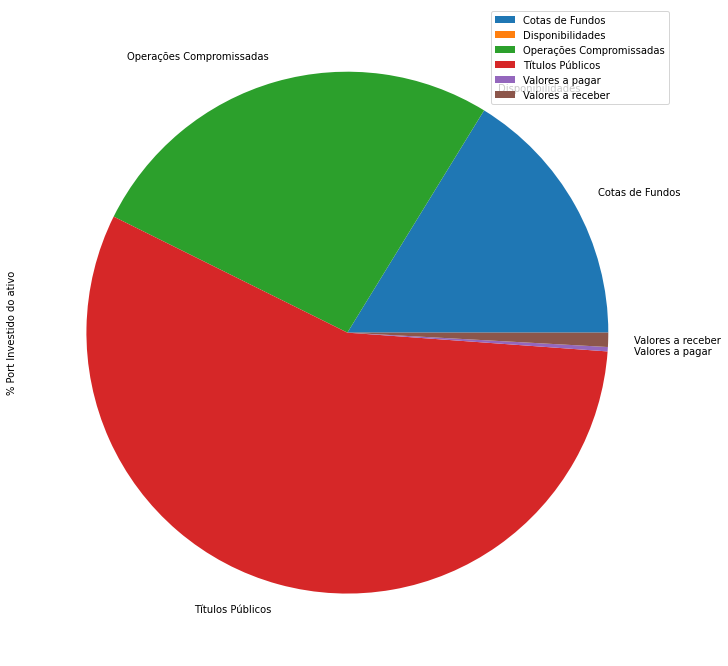

In [21]:
# Agrupando por Tipo de Ativo
pizza = carteira[['TP_APLIC','% Port Investido do ativo']]
pizza_agrupado = pizza.groupby(['TP_APLIC']).sum()
pizza_agrupado.plot(kind='pie',y='% Port Investido do ativo',figsize=(20,12))

<Axes: ylabel='% Port Investido do ativo'>

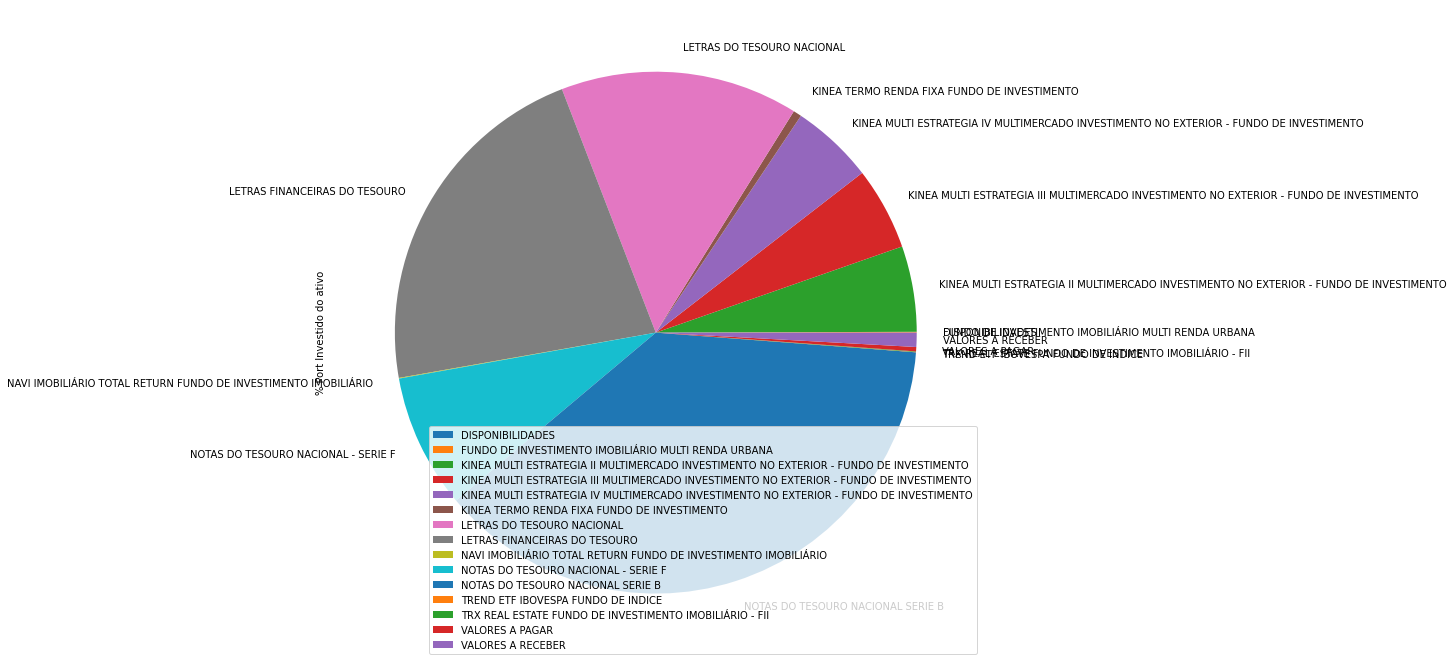

In [20]:
#Agrupando por ativo
pizza = carteira[['ATIVO','% Port Investido do ativo']]
pizza_agrupado = pizza.groupby(['ATIVO']).sum()
pizza_agrupado.plot(kind='pie',y='% Port Investido do ativo',figsize=(20,12))